# 03_K-Nearest Neighbors(KNN)

    ## 3.1 개념
    ## 3.2 KNN의 수행단계
    ## 3.3 setup
    ## 3.4 Collecting and exploring data
    ## 3.5 Normalizing data
    ## 3.6 Creating training and test data sets
    ## 3.7 Learning from data/training the model
    ## 3.8 Evaluating the model

## 3.1 개념

K-Nearest-Neighbors 또는 KNN 알고리즘은 구현 및 이해의 관점에서 가장 단순한 알고리즘 중 하나입니다. 이 것은 데이터를 분류하는 데 도움이되는 지도 학습 알고리즘 중 하나.  

* KNN은 이웃에 대한 유사성을 기반으로 데이터 포인트에 라벨을 지정  
* KNN은 레이블이 지정되지 않은 (또는 보이지 않는) 데이터 포인트에 가장 유사한 레이블이 붙은 데이터 포인트 (또는 훈련 샘플)의 클래스를 지정하여 분류하는 프로세스로 설명됨  

---

1. KNN은 지도학습 알고리즘이기 때문에 여러 클래스로 분류되는 예제의 학습 데이터 세트로 시작함. 
2. 그런 다음 알고리즘은 테스트 데이터 세트의 각 데이터 포인트를 선택하고 선택한 유사성 척도에 따라 k 개의 가장 가까운 이웃을 식별(k는 미리 지정됨). 
3. 그런 다음 데이터 포인트에 k 개의 가장 가까운 이웃의 대다수의 클래스가 지정됩니다.

* KNN의 능력을 올리는 트릭은 유사성 측정임  
* 이용 가능한 다양한 유사성 척도가 있으며 하나를 선택하는 결정은 문제의 복잡성, 데이터 유형 등을 기반으로 함.  
**유클리드 거리 (Euclidean distance)**는 널리 사용되는 측정법 중 하나임  
**유클리드 거리는 두 점 사이의 최단 직선 경로**  
* 수학적으로 다음과 같이 주어짐 :  

$$Euclidean \; - distance(p,\,q)=\sqrt{ \sum^{n}_{i=1}{(q_{i}-p_{i})^{2}} }$$

**맨해튼 거리**, **코사인 거리** 및 **민코프스키 거리**는 가장 가까운 이웃을 찾는 데 사용할 수있는 거리 측정의 다른 유형임  

---

* KNN 알고리즘의 주요 파라미터는 K-Nearest Neighbors의 $k$임. $k$ 값은 KNN 모델이 테스트 데이터로 얼마나 잘 일반화되는지를 결정. 훈련 데이터의 과대적합과 과소적합사이의 균형은 $k$의 값에 달려 있음  
* 약간의 과정을 통해 큰 $k$는 노이즈가 많은 데이터로 인한 분산의 영향을 최소화하지만 동시에 중요한 패턴을 손상시킬 것임을 알아야 함. 이 문제를 **바이어스-분산 트레이드 오프**라고 함
* $k$의 최적 값은 결정하기는 어렵지만 **$k = 1$**에서 **$k = 훈련 샘플의 총 수**$ 사이에 놓임. 일반적으로 $k$의 값을 훈련 인스턴스의 제곱근과 같게 설정하는 것이 관례이며, 일반적으로 3과 10 사이임  

---

* KNN 알고리즘은 또한 특성 스케일에 영향을 많이 받음  
* 입력 벡터를 준비하는 데 사용되는 기능은 비슷한 척도를 사용해야 함  
* 이 단계의 근거는 거리 수식이 형상을 측정하는 방법에 따라 달라짐  
* 특정 특성이 다른 특성과 비교하여 넓은 범위의 값을 갖는 경우, 거리 측정치는 그러한 측정치에 의해 지배 됨. 유사한 스케일로 특성을 스케일하는 방법을 **정규화**라고합니다. 거리 측정과 매우 유사하게 다양한 정규화 방법을 사용할 수 있음  
* 방법 중 하나는 min-max 정규화이며 수학적으로 다음과 같이 주어짐:  

$$ x_{new} = \frac{ x - min(x) }{ max(x) - min(x) } $$

## 3.2 KNN의 수행단계

1. 데이터 수집 및 데이터 탐색 : 학습 할 개념과 관련된 데이터를 수집  
2. 데이터 정규화 : KNN의 거리 측정에 대한 의존성은 계산에서 일관성 또는 편향을 없애기 위해 데이터를 표준화  
3. 훈련 및 시험 데이터 세트 작성 
4. 학습 : 훈련 데이터 세트, 테스트 데이터 세트, 레이블 및 $k$ 값을 사용하여 모델을 학습하고 테스트 데이터 세트의 데이터 포인트에 레이블을 붙일 수 있음  
5. 모델 평가 : 마지막 단계는 학습 패턴을 평가  
    * 분할표(confusion matrix)

## 3.3 setup

In [21]:
library(repr)
options(repr.plot.width=7, repr.plot.height=4)
options(buildtools.check = function(action) TRUE )

## 3.4 Collecting and exploring data

**iris 이미지**

<img src="../sklearn/images/iris.png" alt="Smiley face">

In [22]:
#to view top few rows of data
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [6]:
#to view data types, sample values, categorical values, etc
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [7]:
#detailed view of the data set
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

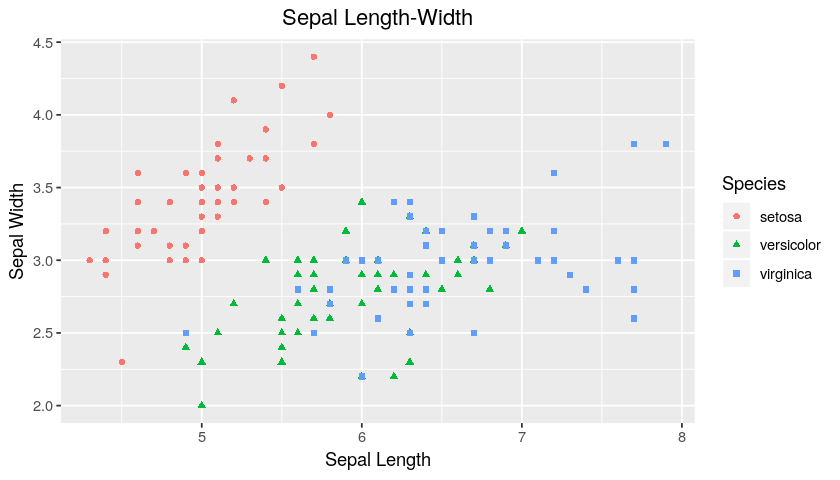

In [23]:
# plotting
library(ggplot2)
ggplot(data=iris, aes(x = Sepal.Length, y = Sepal.Width)) + 
    geom_point(aes(color=Species, shape=Species)) +
    xlab("Sepal Length") +  ylab("Sepal Width") +
    ggtitle("Sepal Length-Width") + 
    theme(plot.title = element_text(hjust = 0.5))

## 3.5 Normalizing data

In [9]:
#normalization function
min_max_normalizer = function(x) 
{ 
  num = x - min(x) 
  denom = max(x) - min(x) 
  return (num/denom) 
}

In [10]:
#normalizing iris data set
normalized_iris = as.data.frame(lapply(iris[1:4], min_max_normalizer))

In [11]:
#viewing normalized data
summary(normalized_iris)

  Sepal.Length     Sepal.Width      Petal.Length     Petal.Width     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2222   1st Qu.:0.3333   1st Qu.:0.1017   1st Qu.:0.08333  
 Median :0.4167   Median :0.4167   Median :0.5678   Median :0.50000  
 Mean   :0.4287   Mean   :0.4406   Mean   :0.4675   Mean   :0.45806  
 3rd Qu.:0.5833   3rd Qu.:0.5417   3rd Qu.:0.6949   3rd Qu.:0.70833  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  

In [12]:
#checking the data constituency
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

## 3.6 Creating training and test data sets

In [13]:
#set seed for randomization
set.seed(1234)

# setting the training-test split to 67% and 37% respectively
random_samples = sample(2, nrow(iris), replace=TRUE, prob=c(0.67, 0.33))

In [14]:
# training data set
iris.training = iris[
  random_samples ==1, 1:4] 

#training labels
iris.trainLabels = iris[
  random_samples ==1, 5]

In [15]:
# test data set
iris.test = iris[
  random_samples ==2, 1:4]

#testing labels
iris.testLabels = iris[
  random_samples ==2, 5]

## 3.7 Learning from data/training the model

In [16]:
#setting library
library(class)

#executing knn for k=3
iris_model = knn(train = iris.training, test = iris.test, cl = iris.trainLabels, k=3)

In [17]:
#summary of the model learnt
print(iris_model)

 [1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] versicolor versicolor versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] virginica  virginica  virginica  virginica  versicolor virginica 
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica


## 3.8 Evaluating the model

In [18]:
#setting library
library(gmodels)

#Preparing cross table
CrossTable(x = iris.testLabels, y = iris_model, prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  40 

 
                | iris_model 
iris.testLabels |     setosa | versicolor |  virginica |  Row Total | 
----------------|------------|------------|------------|------------|
         setosa |         12 |          0 |          0 |         12 | 
                |      1.000 |      0.000 |      0.000 |      0.300 | 
                |      1.000 |      0.000 |      0.000 |            | 
                |      0.300 |      0.000 |      0.000 |            | 
----------------|------------|------------|------------|------------|
     versicolor |          0 |         12 |          0 |         12 | 
                |      0.000 |      1.000 |      0.000 |      0.300 | 
                |      0.000 |      0.923 |      0.000 |            | 
                |      0.000 |    

* 앞의 결과에서 모델이 virginica의 한 인스턴스를 versicolor로 분류했으며 다른 모든 테스트 데이터 포인트는 정확하게 레이블링되었다고 결론 지을 수 있음. 이 것은 또한 k = 3의 선택이 실제로 충분하다는 것을 추론할 수 있음  
* KNN은 기본 데이터 분포에 대한 가정을하지 않는 단순하면서도 강력한 알고리즘이므로 기능과 클래스 간의 관계가 복잡하거나 이해하기 어려운 경우에 사용할 수 있음  
* 단점이라면 KNN은 데이터를 처리하기 위해 많은 양의 메모리가 필요  
* KNN은 텍스트 마이닝, 심장 발작 예측, 암 예측 등과 같은 실제 생활에 적용됨  